## Solving the Problem Statement using PyCaret Library

# PyCaret :

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

1) Installing PyCaret on your Machine

   Pycaret and all dependencies already installed in virtual environment

In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

In [2]:
print('Using PyCaret Version', pycaret.__version__)
print('Path to PyCaret: ', pycaret.__file__)

Using PyCaret Version 3.1.0
Path to PyCaret:  C:\Users\franc\AppData\Roaming\Python\Python310\site-packages\pycaret\__init__.py


2) Accessing Data

There are two ways to register your data into PyCaret:

2.1) Loading a Dataframe with Pandas

2.2) Using the Data Repository

3.1) Loading a Dataframe with Pandas

The first way to get data into PyCaret is simply to load up a Pandas dataframe and then pass it to PyCaret.

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


3.2) Using the Data Repository

The second way of getting data, which is used in the PyCaret tutorials, is to pull in a curated dataset from the PyCaret Data Repository. The repository helpfully includes popular sample datasets for classification, regression, clustering, NLP, etc.

3.3) Experiment Setup

Many often-tedious preprocessing steps are taken care of automatically in PyCaret, which standardizes and conveniently packages fundamental data preparation steps into repeatable time-saving workflows. Users are able to automate cleaning (e.g. handling missing values with various imputation methods available), splitting into train and test sets, as well as some aspects of feature engineering and training. While many of the objects created in this process aren’t explicitly shown to the user (such as train and test sets, or label vectors), they are accessible if needed or desired by more experienced practitioners.

In [7]:
from pycaret.classification import *
# Use the setup function
clf1 = setup(data=df, target='Class')

,Description,Value
0,Session id,1093
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [8]:

clf1 = setup(data=df, 
             target = 'Class',                # Use your target variable.
             session_id=123, 
             log_experiment=True, 
             experiment_name='CC_Fraud_Detection'     # Use any experiment name.
                                    # Runs the command without user input. 
            )



,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


2023/11/06 19:20:44 INFO mlflow.tracking.fluent: Experiment with name 'CC_Fraud_Detection' does not exist. Creating a new experiment.


#### Model Comparation

In [9]:
# Comparing models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9566,0.7969,0.9528,0.8668,0.8666,0.8706,49.5480
et,Extra Trees Classifier,0.9996,0.9595,0.7911,0.9456,0.8601,0.8599,0.8640,8.0430
xgboost,Extreme Gradient Boosting,0.9996,0.9773,0.7993,0.9426,0.8646,0.8644,0.8676,1.4580
catboost,CatBoost Classifier,0.9996,0.9799,0.8082,0.9491,0.8726,0.8724,0.8754,30.4150
lda,Linear Discriminant Analysis,0.9994,0.9085,0.7795,0.8771,0.8240,0.8237,0.8258,1.4100
lr,Logistic Regression,0.9992,0.9565,0.6483,0.8540,0.7358,0.7354,0.7431,4.0620
ada,Ada Boost Classifier,0.9992,0.9804,0.7035,0.8268,0.7582,0.7579,0.7613,19.5770
dt,Decision Tree Classifier,0.9991,0.8822,0.7648,0.7555,0.7564,0.7559,0.7578,4.0420
ridge,Ridge Classifier,0.9989,0.0000,0.4247,0.8508,0.5625,0.5620,0.5982,0.1380
gbc,Gradient Boosting Classifier,0.9989,0.6422,0.5081,0.7811,0.5929,0.5924,0.6165,107.5180


In [10]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [11]:
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9566,0.7969,0.9528,0.8668,0.8666,0.8706,44.9250
et,Extra Trees Classifier,0.9996,0.9595,0.7911,0.9456,0.8601,0.8599,0.8640,7.4470
xgboost,Extreme Gradient Boosting,0.9996,0.9773,0.7993,0.9426,0.8646,0.8644,0.8676,1.5630
catboost,CatBoost Classifier,0.9996,0.9799,0.8082,0.9491,0.8726,0.8724,0.8754,29.2250
lda,Linear Discriminant Analysis,0.9994,0.9085,0.7795,0.8771,0.8240,0.8237,0.8258,1.4230
lr,Logistic Regression,0.9992,0.9565,0.6483,0.8540,0.7358,0.7354,0.7431,3.5290
ada,Ada Boost Classifier,0.9992,0.9804,0.7035,0.8268,0.7582,0.7579,0.7613,19.6460
dt,Decision Tree Classifier,0.9991,0.8822,0.7648,0.7555,0.7564,0.7559,0.7578,4.1440
ridge,Ridge Classifier,0.9989,0.0000,0.4247,0.8508,0.5625,0.5620,0.5982,0.1610
gbc,Gradient Boosting Classifier,0.9989,0.6422,0.5081,0.7811,0.5929,0.5924,0.6165,106.3930


In [12]:
top3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 XGBC

In [13]:
# return best model based on AUC
best = compare_models(sort = 'AUC') # default is 'Accuracy'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9992,0.9804,0.7035,0.8268,0.7582,0.7579,0.7613,19.5470
catboost,CatBoost Classifier,0.9996,0.9799,0.8082,0.9491,0.8726,0.8724,0.8754,27.2320
xgboost,Extreme Gradient Boosting,0.9996,0.9773,0.7993,0.9426,0.8646,0.8644,0.8676,1.5230
qda,Quadratic Discriminant Analysis,0.9766,0.9702,0.8724,0.0610,0.1140,0.1111,0.2270,0.5200
nb,Naive Bayes,0.9934,0.9697,0.6487,0.1569,0.2524,0.2503,0.3167,0.1610
et,Extra Trees Classifier,0.9996,0.9595,0.7911,0.9456,0.8601,0.8599,0.8640,7.2510
rf,Random Forest Classifier,0.9996,0.9566,0.7969,0.9528,0.8668,0.8666,0.8706,49.2470
lr,Logistic Regression,0.9992,0.9565,0.6483,0.8540,0.7358,0.7354,0.7431,3.6360
lda,Linear Discriminant Analysis,0.9994,0.9085,0.7795,0.8771,0.8240,0.8237,0.8258,1.5300
dt,Decision Tree Classifier,0.9991,0.8822,0.7648,0.7555,0.7564,0.7559,0.7578,4.2060


### Model Training & Selection

5) Train and tune specific models

From compare_models, we were easily able to see the best baseline models for each metric, and select those for further investigation.

For example, if we were looking for the model with the highest AUC above, we would have elected to continue with random forest. We can then save and fine tune our model using the create_model and tune_model functions.

In [14]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9994,0.9111,0.7246,0.9259,0.8130,0.8127,0.8189
1,0.9996,0.9553,0.8116,0.9333,0.8682,0.8680,0.8701
2,0.9996,0.9481,0.7971,0.9649,0.8730,0.8728,0.8768
3,0.9995,0.9626,0.7971,0.9167,0.8527,0.8525,0.8546
4,0.9997,0.9920,0.8529,1.0000,0.9206,0.9205,0.9234
Mean,0.9996,0.9538,0.7967,0.9482,0.8655,0.8653,0.8688
Std,0.0001,0.0261,0.0414,0.0306,0.0347,0.0348,0.0339


The code creats and evaluats a Random Forest (RF) model using PyCaret. The output you see is a tabular representation of the model's performance metrics, which are evaluated over a 5-fold cross-validation. Here's an explanation of the metrics and what they mean:

1. **Fold**: This column represents the individual cross-validation fold. In this case, it is 5 folds.

2. **Accuracy**: Accuracy measures the proportion of correctly classified instances. It's the ratio of correctly predicted instances to the total instances.

3. **AUC (Area Under the Receiver Operating Characteristic Curve)**: AUC is a measure of the model's ability to distinguish between the positive and negative classes. A higher AUC indicates better discrimination.

4. **Recall (Sensitivity or True Positive Rate)**: Recall is the ratio of correctly predicted positive instances to all actual positive instances. It measures the model's ability to identify fraud cases correctly.

5. **Precision (Positive Predictive Value)**: Precision is the ratio of correctly predicted positive instances to all instances predicted as positive. It measures the accuracy of positive predictions.

6. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between these two metrics, which is especially useful when dealing with imbalanced datasets.

7. **Kappa**: Cohen's Kappa is a statistic that measures the agreement between the model's predictions and the actual data, considering the possibility of the agreement occurring by chance.

8. **MCC (Matthews Correlation Coefficient)**: MCC is another metric that measures the quality of binary classifications. It considers true and false positives and negatives and provides a balanced measure even for imbalanced datasets.

**Interpretation**:

- The model achieved high accuracy (close to 1.0) in all five cross-validation folds, indicating that it correctly classified the vast majority of instances.

- The AUC values are also relatively high, suggesting that the model is good at distinguishing between genuine and fraudulent transactions.

- The recall values (measuring the ability to detect fraud) range from approximately 0.725 to 0.853 in the individual folds, which is reasonably good. The mean recall is about 0.797, indicating that the model correctly identifies approximately 79.7% of fraudulent cases on average.

- Precision values (measuring the accuracy of positive predictions) are generally high, with a mean precision of approximately 94.8%. This means that when the model predicts a transaction as fraudulent, it is correct about 94.8% of the time on average.

- The F1 score, a balance between precision and recall, has a mean of approximately 86.5%, indicating a good balance between accurate positive predictions and the ability to detect fraud.

- Kappa and MCC values suggest a substantial level of agreement between model predictions and actual data, even after considering random chance.

Overall, the Random Forest model seems to perform very well in detecting credit card fraud, with high accuracy, AUC, and a good balance between precision and recall. The model shows strong potential for identifying fraudulent transactions while minimizing false positives.

#### Hypertuning of model
tuned_rf = tune_model(rf)

In [ ]:
Tuned_rf = tune_model(rf)

Plot AUC curve

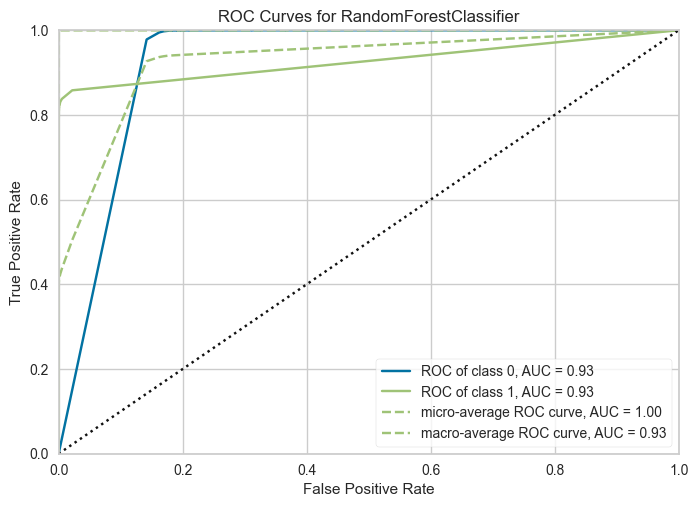

In [16]:
#plot_model(estimator = tuned_rf, plot = 'auc')
plot_model(estimator = rf, plot = 'auc')

Interpretation:

The result includes the ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve) values for class 0, class 1, micro-average ROC curve, and macro-average ROC curve. Here's how to interpret these values:

1. **ROC of Class 0, AUC = 0.93**:
   - This indicates the ROC curve for the negative class (non-fraudulent transactions).
   - An AUC of 0.93 suggests that the model's ability to distinguish non-fraudulent transactions from true negatives is high. The closer the AUC is to 1, the better the model's performance for this class.

2. **ROC of Class 1, AUC = 0.93**:
   - This corresponds to the ROC curve for the positive class (fraudulent transactions).
   - An AUC of 0.93 suggests that the model's ability to distinguish fraudulent transactions from true positives is also high. This is a positive sign for detecting fraud.

3. **Micro-average ROC curve, AUC = 1.00**:
   - The micro-average is computed across all instances (both classes) and then used to compute the ROC and AUC.
   - An AUC of 1.00 means that, overall, the model's performance across both classes (fraudulent and non-fraudulent) is excellent. It can effectively separate the two classes.

4. **Macro-average ROC curve, AUC = 0.93**:
   - The macro-average computes the ROC and AUC for each class separately and then averages them.
   - An AUC of 0.93 for the macro-average indicates that the model performs well on average across both classes.

In summary, the model appears to be effective in distinguishing both fraudulent (class 1) and non-fraudulent (class 0) transactions, with AUC values of 0.93 for both classes. The micro-average AUC of 1.00 suggests an excellent overall model performance. The macro-average AUC of 0.93 shows a strong average performance considering both classes. These results are promising for credit card fraud detection.

Precision-Recall Curve

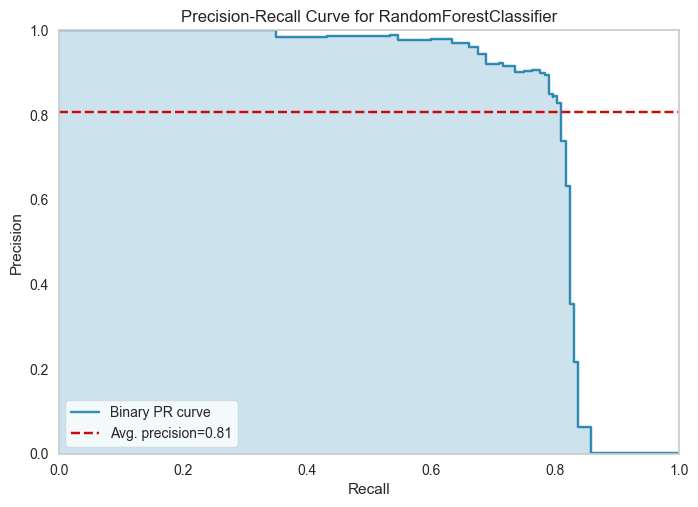

In [17]:
plot_model(estimator = rf, plot = 'pr')

Interpretation:

The result  "Avg. precision = 0.81," represents the average precision score. The average precision score is a metric used to evaluate the quality of a binary classification model, particularly in cases where there is a class imbalance. Here's how to interpret an average precision score of 0.81:

- **Average Precision (AP)**: In the context of binary classification, average precision is a measure of the model's ability to rank positive examples (in this case, fraud cases) higher than negative examples (non-fraud cases).

- **Interpretation**: An average precision score ranges from 0 to 1, where a higher value indicates better model performance. An average precision of 0.81 is a good score, suggesting that the model is relatively effective at ranking the fraud cases higher and thus capturing most of the fraud cases while minimizing false positives.

- **Threshold Selection**: The average precision score considers the precision-recall trade-off at various classification thresholds. It quantifies the overall ability of the model to identify true positives (fraud cases) while keeping false positives at a minimum.

- **Model Quality**: An average precision score of 0.81 is considered quite good, but the interpretation of its practical significance can depend on the specific problem and domain. If the average precision is high, it indicates that the model is making effective predictions for fraud detection.

In summary, an average precision score of 0.81 suggests that the model is doing a good job of identifying fraudulent credit card transactions while maintaining a reasonable level of precision (minimizing false positives). It's a positive sign of the model's quality for fraud detection.

Plot Confusion Matrix 

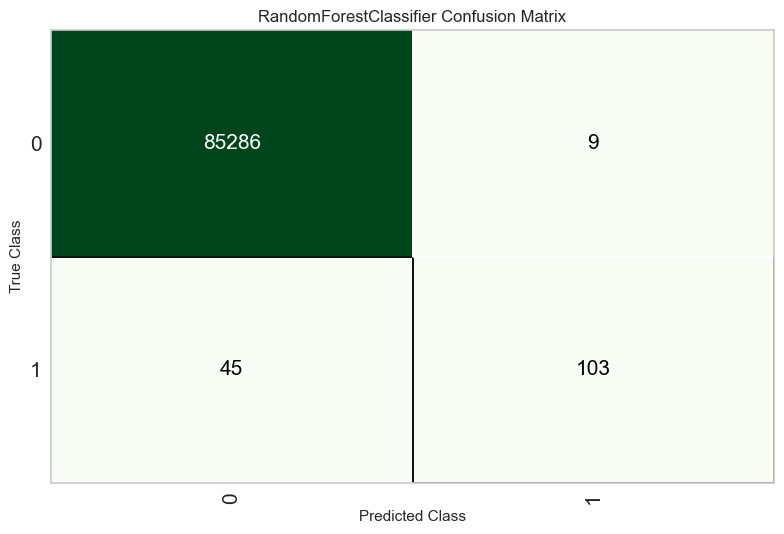

In [18]:
#plot_model(estimator = tuned_rf, plot = 'confusion_matrix')
plot_model(estimator = rf, plot = 'confusion_matrix')

Plot feature Importance

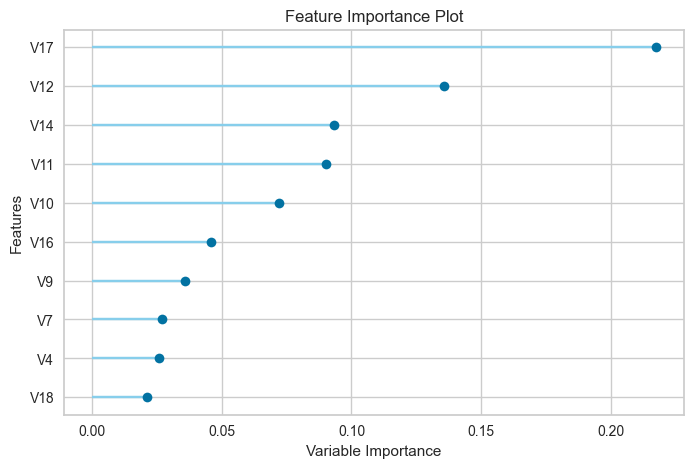

In [19]:
#plot_model(estimator=tuned_rf, plot='feature')
plot_model(estimator=rf, plot='feature')

Evaluating the model

In [20]:
#evaluate_model(tuned_rf)
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

 Predict Data

In [21]:
predict_model(rf)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
263193,160838.0,1.773996,-0.537269,-0.497683,1.467343,-0.413799,0.205866,-0.380243,0.234159,1.184537,...,0.352625,-0.522553,-0.401525,-1.100816,0.030067,-0.036078,75.099998,0,0,1.0
2081,1607.0,-0.355813,1.037123,1.142809,-0.139668,0.223897,-0.447363,0.572302,0.126015,-0.554029,...,-0.068094,-0.118282,-0.156061,0.079906,0.238000,0.083122,3.870000,0,0,1.0
133224,80298.0,-0.809220,1.089048,1.817309,0.437871,0.080895,-0.444310,0.798890,-0.092322,-0.884040,...,0.009162,0.388165,-0.034324,0.224980,-0.058677,0.077619,34.990002,0,0,1.0
60998,49603.0,-1.223310,1.147941,2.185282,1.541477,0.416432,0.444696,0.092636,-1.526573,-0.657095,...,-0.212743,0.295589,0.671208,-0.024381,-0.089125,-0.268532,3.910000,0,0,1.0
175911,122548.0,-1.598422,-0.770830,-1.385428,-1.174047,1.534786,-1.518425,0.584878,-0.030458,-1.636121,...,1.248286,0.522063,-0.143375,0.687884,0.346565,0.058621,22.000000,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,6043.0,-0.354609,0.218017,0.948311,-1.209809,-1.047687,-0.439117,-0.350992,0.175878,-1.806421,...,0.308629,-0.036684,-0.618889,-0.465818,0.009511,0.077092,52.840000,0,0,1.0
32739,36947.0,-1.165050,3.300642,-3.739382,1.544947,-0.096599,-1.839098,-0.461701,1.436760,-0.566034,...,0.263462,-0.450204,-0.109511,-0.350047,0.076010,-0.055885,1.290000,0,0,1.0
266399,162314.0,0.001642,0.765404,0.337920,-0.673267,0.340427,-0.875732,0.846641,-0.015391,-0.174602,...,0.073081,0.046371,-0.563234,0.118114,0.238624,0.085990,0.890000,0,0,1.0
147522,88642.0,1.854807,-0.489947,-3.128500,-0.599539,2.459330,3.243707,-0.427428,0.812050,0.871705,...,0.157052,0.588333,-0.058313,-0.076037,-0.002786,-0.014170,88.849998,0,0,1.0


Interpretation:

The output of running the `predict_model` function with the Random Forest Classifier model (`rf`) on a dataset. Let's break down the columns in the result:

- `Model`: This column indicates the name of the machine learning model used for prediction, which is the "Random Forest Classifier."

- `Accuracy`: This column shows the accuracy of the model's predictions, which is approximately 99.94%. It means that the model correctly predicted around 99.94% of the cases in the dataset.

- `AUC` (Area Under the ROC Curve): AUC is a metric that measures the model's ability to distinguish between positive and negative classes. In this case, the AUC is approximately 0.9272, which is a good value.

- `Recall`: This column represents the recall or true positive rate, which is approximately 69.59%. Recall measures the model's ability to correctly identify positive cases out of all actual positive cases.

- `Prec.` (Precision): Precision is approximately 91.96%. It measures the percentage of true positive predictions among all positive predictions made by the model.

- `F1`: The F1 score, which is approximately 79.23%, is the harmonic mean of precision and recall. It provides a balance between precision and recall.

- `Kappa`: Kappa is a measure of inter-rater agreement, and it's approximately 0.792, indicating substantial agreement.

- `MCC` (Matthews Correlation Coefficient): MCC is approximately 0.7997 and is another measure of the quality of binary classifications. It takes into account true positives, true negatives, false positives, and false negatives.

Following the model evaluation metrics, a table with several columns:

- `Time` and the columns `V1` to `V28`: These columns appear to be features in the dataset but have been masked here. They represent various features used by the model for prediction.

- `Amount`: This column represents the transaction amount.

- `Class`: This column represents the true class label, where 0 typically indicates a legitimate transaction, and 1 indicates a fraudulent transaction.

- `prediction_label`: This column contains the predicted class labels (0 or 1) based on the model's predictions.

- `prediction_score`: This column contains the predicted probability scores for the positive class (fraudulent transaction).

- The last two columns, `0` and `1`, seem to represent the predicted class labels (0 or 1) for the original class labels (0 or 1).

This output shows the model's performance on a dataset, with predictions and corresponding evaluation metrics for each instance in the dataset. It's essential for assessing the model's effectiveness in identifying fraudulent transactions, and the evaluation metrics indicate that the model is performing well with high accuracy, AUC, precision, recall, F1 score, Kappa, and MCC.

Finalize and Save Pipeline

In [22]:
final_rf = finalize_model(rf)
final_rf

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Time', 'V1', 'V2', 'V3', 'V4',
                                             'V5', 'V6', 'V7', 'V8', 'V9',
                                             'V10', 'V11', 'V12', 'V13', 'V14',
                                             'V15', 'V16', 'V17', 'V18', 'V19',
                                             'V20', 'V21', 'V22', 'V23', 'V24',
                                             'V25', 'V26', 'V27', 'V28',
                                             'Amount'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

The code `final_rf = finalize_model(rf)` is used to finalize a machine learning model created with PyCaret. Finalizing a model typically involves training it on the entire dataset and making it ready for deployment. Once you have finalized the model, you can use it for making predictions on new, unseen data.

After running this code, `final_rf` contains the finalized Random Forest Classifier model, and you can use it for prediction. To make predictions using the `final_rf` model, you can use the `predict_model` function or pass new data to the model for inference.

The `finalize_model` function in PyCaret is used to complete the training of the model and prepare it for use in production or further analysis. It is often used after model selection and tuning have been performed to ensure the selected model is fully trained and optimized.

Here's a summary of the steps:

1. You trained an initial Random Forest Classifier model (`rf`) on your dataset.
2. You used the `finalize_model` function to complete the training of the model and prepare it for deployment.
3. The finalized model, `final_rf`, can now be used to make predictions on new data.

We will use the `final_rf` model to make predictions on new data, it can be done using the `predict_model` function with the finalized model as an argument. i.e

```python
new_data = ...  # Your new data
predictions = predict_model(final_rf, data=new_data)
```

This will provide predictions based on the `final_rf` model's learned patterns and parameters.

In [23]:
predict_model(final_rf)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
263193,160838.0,1.773996,-0.537269,-0.497683,1.467343,-0.413799,0.205866,-0.380243,0.234159,1.184537,...,0.352625,-0.522553,-0.401525,-1.100816,0.030067,-0.036078,75.099998,0,0,1.0
2081,1607.0,-0.355813,1.037123,1.142809,-0.139668,0.223897,-0.447363,0.572302,0.126015,-0.554029,...,-0.068094,-0.118282,-0.156061,0.079906,0.238000,0.083122,3.870000,0,0,1.0
133224,80298.0,-0.809220,1.089048,1.817309,0.437871,0.080895,-0.444310,0.798890,-0.092322,-0.884040,...,0.009162,0.388165,-0.034324,0.224980,-0.058677,0.077619,34.990002,0,0,1.0
60998,49603.0,-1.223310,1.147941,2.185282,1.541477,0.416432,0.444696,0.092636,-1.526573,-0.657095,...,-0.212743,0.295589,0.671208,-0.024381,-0.089125,-0.268532,3.910000,0,0,1.0
175911,122548.0,-1.598422,-0.770830,-1.385428,-1.174047,1.534786,-1.518425,0.584878,-0.030458,-1.636121,...,1.248286,0.522063,-0.143375,0.687884,0.346565,0.058621,22.000000,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,6043.0,-0.354609,0.218017,0.948311,-1.209809,-1.047687,-0.439117,-0.350992,0.175878,-1.806421,...,0.308629,-0.036684,-0.618889,-0.465818,0.009511,0.077092,52.840000,0,0,1.0
32739,36947.0,-1.165050,3.300642,-3.739382,1.544947,-0.096599,-1.839098,-0.461701,1.436760,-0.566034,...,0.263462,-0.450204,-0.109511,-0.350047,0.076010,-0.055885,1.290000,0,0,1.0
266399,162314.0,0.001642,0.765404,0.337920,-0.673267,0.340427,-0.875732,0.846641,-0.015391,-0.174602,...,0.073081,0.046371,-0.563234,0.118114,0.238624,0.085990,0.890000,0,0,1.0
147522,88642.0,1.854807,-0.489947,-3.128500,-0.599539,2.459330,3.243707,-0.427428,0.812050,0.871705,...,0.157052,0.588333,-0.058313,-0.076037,-0.002786,-0.014170,88.849998,0,0,1.0


Interpretation:

The code `predict_model(final_rf)` is used to make predictions on a model created using PyCaret. In this case, you have used a Random Forest Classifier model (`final_rf`) for prediction. The result you've provided is the output of this prediction process. Let's break down the result:


The table below the summary statistics shows specific predictions for individual data points. It includes columns for features (Time, V1-V28, Amount), the actual class (Class), the predicted label (prediction_label), and the prediction score (prediction_score). For each row, it displays the feature values, the true class (0 or 1), the predicted class (1.0, indicating fraud), and the prediction score (probability of being fraud).



Save Pipeline

In [24]:
# save model to disk
save_model(best_model, 'CC_Fraud_Detection-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Time', 'V1', 'V2', 'V3', 'V4',
                                              'V5', 'V6', 'V7', 'V8', 'V9',
                                              'V10', 'V11', 'V12', 'V13', 'V14',
                                              'V15', 'V16', 'V17', 'V18', 'V19',
                                              'V20', 'V21', 'V22', 'V23', 'V24',
                                              'V25', 'V26', 'V27', 'V28',
                                              'Amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  

Deployment